## Hypothesis
To predict the incentive level requested for letting utility companies to lower thermostat setting 
    for 2-3 degrees F when being at home in winter
    
DV: IncAutoS
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ, Latitude, HomeS, EnergyC, 
    MC, ComfNS, HabitC, Trust

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [146]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
table(survey$HomeS)

table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)
sort(names(data1))


 40  50  55  58  60  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76 
  4   9   4   1  25   8   1   4  39   5   4  63  15 120  10  90  27  36  68  30 
 77  78  79  80  81  82  85 
 15  51   7  19   2   1   4 


 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 
  8   1   4  39   5   4  63  15 120  10  90  27  36  68  30  15  51   7 


 50  58  60  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78 
  1   1   8   4   3  10  44  13  24 107  27 104  13  83  23  17  43   7   7  11 
 79  80  84  87 
  1  13   1   1 


 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79 
  4   3  10  44  13  24 107  27 104  13  83  23  17  43   7   7  11   1 

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"


 1  2  3  4  5  6  7  8  9 10 11 12 
58 51 27 19  9 33 68 53 36 79 16 91 


 1  2  3  4  5  6  7  8 
82 47 88 98 61 48 63 53 

[1] "Age"        "Atti1"      "Atti2"      "Atti3"      "Atti4"     
 [6] "AwayS"      "AwayW"      "BillS"      "BillW"      "ComfNS1"   
[11] "ComfNS2"    "ComfNS3"    "ComfNW1"    "ComfNW2"    "ControlN1" 
[16] "ControlN2R" "ControlN3"  "ControlN4"  "ConvB1"     "ConvB2"    
[21] "ConvB3"     "ConvB4"     "Educ"       "EmerRForm"  "EnergyC1"  
[26] "EnergyC2"   "EnergyC3"   "EnergyC4"   "Ethnic"     "Frugal1"   
[31] "Frugal2"    "Frugal3"    "Gender"     "HabitC1"    "HabitC2"   
[36] "HabitC3"    "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"   
[41] "HabitE1"    "HabitE2"    "HabitE3"    "HomeS"      "HomeW"     
[46] "HouseholdS" "INT1"       "INT2"       "INT3"       "INT4"      
[51] "IncAutoS"   "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncDish"   
[56] "IncEmer10S" "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"  
[61] "IncHomeW"   "IncWD"      "Income"     "Latitude"   "MC1"       
[66] "MC2"        "MC3"        "MC4"        "MC5"        "OwnRent"   
[71] "PBC1"       "PBC2"       "PBC3R"      "PBC4"       "PBC5"      
[76] "Political"  "RewardForm" "SN1"        "SN2"        "SN3"       
[81] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm1"  
[86] "SubNorm2"   "SubNorm3"   "Trust1"     "Trust2"     "Trust3"    
[91] "Trust4"

In [147]:
#Frugal-Mean(Frugal1,Frugal2,Frugal3)
tmp <- cbind(Frugal1=data1$Frugal1,Frugal2=data1$Frugal2,Frugal3=data1$Frugal3)
print(dim(tmp))
data1$Frugal <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Frugal1","Frugal2","Frugal3"))]
#print(data1)
#table(data1$Political)

[1] 732   3


In [148]:
#MC-Mean(MC3,MC4,MC5)
tmp <- cbind(MC3=data1$MC3,MC4=data1$MC4,MC5=data1$MC5)
print(dim(tmp))
data1$MC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("MC3","MC4","MC5"))]
#print(data1)

[1] 732   3


In [149]:
#EnergyC-Mean(EnergyC1,EnergyC2,EnergyC4)
tmp <- cbind(EnergyC1=data1$EnergyC1,EnergyC2=data1$EnergyC2,EnergyC4=data1$EnergyC4)
print(dim(tmp))
data1$EnergyC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("EnergyC1","EnergyC2","EnergyC4"))]
#print(data1)

[1] 732   3


In [150]:
#Trust-Mean(Trust1,Trust2,Trust3,Trust4)
tmp <- cbind(Trust1=data1$Trust1,Trust2=data1$Trust2,Trust3=data1$Trust3,Trust4=data1$Trust4)
print(dim(tmp))
data1$Trust <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Trust1","Trust2","Trust3","Trust4"))]
#print(data1)

[1] 732   4


In [151]:
#ComfNW-Mean(ComfNW1,ComfNW2)
tmp <- cbind(ComfNW1=data1$ComfNW1,ComfNW2=data1$ComfNW2)
print(dim(tmp))
data1$ComfNW <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("ComfNW1","ComfNW2"))]
#print(data1)

[1] 732   2


In [152]:
#Attitude-Mean(Atti1,Atti2,Atti3,Atti4)
tmp <- cbind(Atti1=data1$Atti1,Atti2=data1$Atti2,Atti3=data1$Atti3,Atti4=data1$Atti4)
print(dim(tmp))
data1$Atti <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Atti1","Atti2","Atti3","Atti4"))]
#print(data1)

[1] 732   4


In [153]:
#SubNorm-Mean(SubNorm1,SubNorm2,SubNorm3)
tmp <- cbind(SubNorm1=data1$SubNorm1,SubNorm=data1$SubNorm2,SubNorm3=data1$SubNorm3)
print(dim(tmp))
data1$SubNorm <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SubNorm1","SubNorm2","SubNorm3"))]
#print(data1)

[1] 732   3


In [154]:
#PBC-Mean(PBC1,PBC2,PBC4,PBC5)
tmp <- cbind(PBC1=data1$PBC1,PBC2=data1$PBC2,PBC4=data1$PBC4,PBC5=data1$PBC5)
print(dim(tmp))
data1$PBC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("PBC1","PBC2","PBC4","PBC5"))]
#print(data1)

[1] 732   4


In [155]:
#SN-Mean(SN1,SN2,SN4)
tmp <- cbind(SN1=data1$SN1,SN=data1$SN2,SN4=data1$SN4)
print(dim(tmp))
data1$SN <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SN1","SN2","SN4"))]
#print(data1)

[1] 732   3


In [156]:
#HabitG-Mean(HabitC1,HabitC2,HabitC3,HabitC4)
tmp <- cbind(HabitC1=data1$HabitC1,HabitC2=data1$HabitC2,HabitC3=data1$HabitC3,HabitC4=data1$HabitC4)
print(dim(tmp))
data1$HabitG <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC1","HabitC2","HabitC4","HabitC5"))]
#print(data1)

[1] 732   4


In [157]:
#HabitHC-Mean(HabitC5,HabitC6,HabitC7)
tmp <- cbind(HabitC5=data1$HabitC5,HabitC6=data1$HabitC6,HabitC7=data1$HabitC7)
print(dim(tmp))
data1$HabitC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC5","HabitC6","HabitC7"))]
#print(data1)

[1] 732   2


In [158]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC3" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3" "191"   
[1] "ConvB4" "191"   
[1] "ControlN1" "191"      
[1] "ControlN2R" "191"       
[1] "ControlN3" "191"      
[1] "ControlN4" "191"      
[1] "PBC3R" "192"  
[1] "INT1" "192" 
[1] "INT2" "192" 
[1] "INT3" "192" 
[1] "INT4" "192" 
[1] "SN3" "192"
[1] "HabitC3" "192"    
[1] "HabitE1" "192"    
[1] "HabitE2" "192"    
[1] "HabitE3" "192"    
[1] "S

In [159]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeS","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732  62
[1] 515  62


In [160]:
#Political (Categorical- recode 5,6,7 as “1”-republican, 
                        #recode 4,8 as “2”- apolitical, 
                        #recode 1,2,3 as “3”- democrat)
table(data2$Political)
data2$Political[data2$Political==1]=3 #democrat
data2$Political[data2$Political==2]=3 #democrat
data2$Political[data2$Political==3]=3 #democrat
data2$Political[data2$Political==4]=2 #apolitical
data2$Political[data2$Political==8]=2 #apolitical
data2$Political[data2$Political==5]=1 #republican
data2$Political[data2$Political==6]=1 #republican
data2$Political[data2$Political==7]=1 #republican
table(data2$Political)


 1  2  3  4  5  6  7  8 
76 45 87 95 57 46 59 50 


  1   2   3 
162 145 208 

In [161]:
#data2$Ethnic
#Ethnic (Categorical- keep 1 as “1”- white; group and recode all others as “0”- non white)
table(data2$Ethnic)
data2$Ethnic[data2$Ethnic==1]=1 #white
data2$Ethnic[data2$Ethnic==2]=0 #non-white
data2$Ethnic[data2$Ethnic==3]=0
data2$Ethnic[data2$Ethnic==4]=0
data2$Ethnic[data2$Ethnic==5]=0
data2$Ethnic[data2$Ethnic==6]=0
data2$Ethnic[data2$Ethnic==7]=0
table(data2$Ethnic)


  1   2   3   4   5   6   7 
442  22  17   3  21   8   2 


  0   1 
 73 442 

In [162]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeW",
"Trust")

In [163]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "BillS"      "BillW"      "ComfNS1"   
 [6] "ComfNS2"    "ComfNS3"    "ComfNW"     "ControlN1"  "ControlN2R"
[11] "ControlN3"  "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"    
[16] "ConvB4"     "Educ"       "EmerRForm"  "EnergyC"    "EnergyC3"  
[21] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitC3"   
[26] "HabitE1"    "HabitE2"    "HabitE3"    "HabitG"     "HomeW"     
[31] "HouseholdS" "INT1"       "INT2"       "INT3"       "INT4"      
[36] "IncAutoS"   "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S"
[41] "IncEmer10W" "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"  
[46] "Income"     "Latitude"   "MC"         "MC1"        "MC2"       
[51] "OwnRent"    "PBC"        "PBC3R"      "Political"  "RewardForm"
[56] "SN"         "SN3"        "Sqft"       "SqftCate"   "State"     
[61] "SubNorm"    "Trust"

[1] "Age"        "Atti"       "ComfNW"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HomeW"      "HouseholdS" "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "PBC"        "Political"  "SN"         "SqftCate"  
[21] "SubNorm"    "Trust"      "Trust"

In [164]:
data1 <- data2[, which(names(data2) %in% c("IncAutoW",IVS))];
sort(names(data1))

[1] "Age"        "Atti"       "ComfNW"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HomeW"      "HouseholdS" "IncAutoW"   "Income"     "Latitude"  
[16] "MC"         "OwnRent"    "PBC"        "Political"  "SN"        
[21] "SqftCate"   "SubNorm"    "Trust"

In [165]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [166]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [167]:
#data1 [is.na(data1$IncHomeS), ]

In [168]:
#summary(data1$IncHomeS)
#table(data1$IncHomeS)
#table(data1$HouseholdS)

In [169]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeW"      "IncAutoW"   "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "Latitude"   "Frugal"     "MC"         "EnergyC"   
[16] "Trust"      "ComfNW"     "Atti"       "SubNorm"    "PBC"       
[21] "SN"         "HabitG"     "HabitC"

In [170]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [171]:
#convert all data to numeric values

sapply(data2,sd)

HomeW   IncAutoW        Age     Gender    OwnRent   SqftCate HouseholdS 
      3.34       1.99      11.17       0.50       0.51       1.13       1.21 
 Political     Ethnic     Income       Educ   Latitude     Frugal         MC 
      0.84       0.35       1.95       1.12       5.02       0.93       1.08 
   EnergyC      Trust     ComfNW       Atti    SubNorm        PBC         SN 
      1.39       1.37       1.70       1.08       1.33       0.94       1.41 
    HabitG     HabitC 
      1.15       1.55

In [172]:
hiCor(data2,.7)

<0 x 0 matrix>

In [173]:
#plot(data2$SN,data2$SubNorm,pch=".",scatter=)

In [174]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:22];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:22){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.15
    Frugal    MC EnergyC  Atti SubNorm   PBC    SN HabitG HabitC
PC1  -0.37 -0.32   -0.38 -0.41   -0.33 -0.22 -0.21  -0.27  -0.23
[1] 0.25
     Age OwnRent SqftCate HouseholdS Income
PC2 0.33    0.49     0.51       0.26   0.42
[1] 0.32
    HomeW Gender HouseholdS Ethnic  Educ Latitude ComfNW
PC3  0.55   0.23       0.31  -0.32 -0.26    -0.26   0.47
[1] 0.38
    HouseholdS Political Ethnic Income  Educ EnergyC Trust HabitG
PC4       0.24      -0.5    0.3  -0.22 -0.36   -0.25   0.3   0.25
[1] 0.44
    IncAutoW   Age HouseholdS    MC Trust   PBC   SN HabitG
PC5     -0.5 -0.34       0.26 -0.28   0.3 -0.28 0.31  -0.31
[1] 0.49
    HomeW IncAutoW Gender HouseholdS  Educ Latitude Frugal EnergyC   PBC HabitC
PC6 -0.23     0.23   0.34        0.3 -0.24     0.49   0.22    0.22 -0.21  -0.31
[1] 0.54
     Age Gender HouseholdS Ethnic Income Frugal    MC Trust ComfNW
PC7 0.47    0.5      -0.28   0.22  -0.27  -0.24 -0.21  0.25   0.27
[1] 0.59
    IncAutoW  Educ Latitude ComfNW SubNorm  PBC   

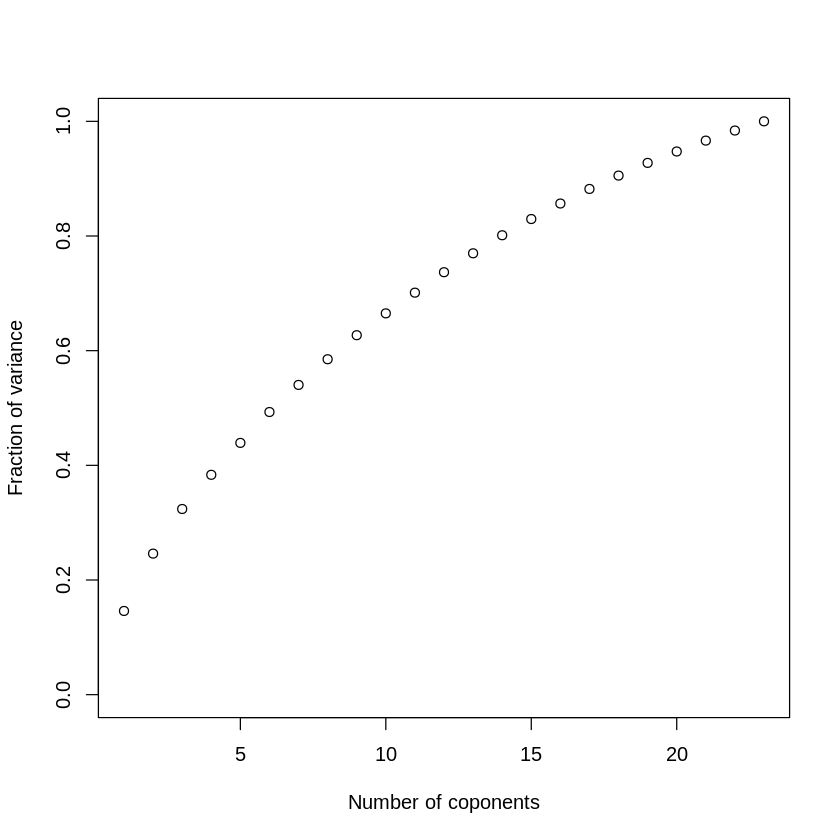

In [175]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [176]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [178]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,18,0.47
EnergyC,15,0.46
SqftCate,6,0.40
Frugal,13,0.39
OwnRent,5,0.33
Income,10,0.29
MC,14,0.28
SubNorm,19,0.27
HouseholdS,7,0.26
Age,3,0.22
HabitG,22,0.20


In [179]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])
sort(names(data2))

[1] "Age"        "Atti"       "ComfNW"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HomeW"      "HouseholdS" "IncAutoW"   "Income"     "Latitude"  
[16] "MC"         "OwnRent"    "PBC"        "Political"  "SN"        
[21] "SqftCate"   "SubNorm"    "Trust"

In [180]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'HomeW', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Trust')

In [181]:
fmla <- as.formula(paste("IncAutoW",paste(IndepPred,collapse="+"),sep="~"));

In [182]:
table(data2[,"IncAutoW"])


  1   2   3   4   5   6   7   8 
 35  58 103 136  51  40  38  54 

In [183]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.579 -1.375 -0.304  1.130  4.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.70417    2.45283    1.92  0.05570 .  
Age          0.02173    0.00838    2.59  0.00980 ** 
Gender       0.01666    0.18353    0.09  0.92771    
OwnRent     -0.13650    0.19913   -0.69  0.49335    
SqftCate     0.14027    0.09512    1.47  0.14093    
HouseholdS  -0.05610    0.08040   -0.70  0.48566    
Political    0.11925    0.10721    1.11  0.26654    
Ethnic      -0.32136    0.25057   -1.28  0.20027    
Income       0.04088    0.05075    0.81  0.42087    
Educ        -0.06298    0.08173   -0.77  0.44126    
Latitude     0.02575    0.01787    1.44  0.15015    
HomeW       -0.00115    0.02960   -0.04  0.96916    
EnergyC     -0.26400    0.06798   -3.88  0.00012 ***
MC           0.10277    0.08255    1.24  0.21372    
ComfNW       0.08709    0.05584    1.56  0.11950    
HabitC      -

In [184]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.462 -1.308 -0.155  1.066  4.405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.33712    3.77586    0.88   0.3779   
Age          0.02550    0.01329    1.92   0.0564 . 
Gender       0.32819    0.29278    1.12   0.2637   
OwnRent     -0.13597    0.30098   -0.45   0.6519   
SqftCate     0.13149    0.15198    0.87   0.3880   
HouseholdS  -0.06865    0.12090   -0.57   0.5708   
Political    0.21104    0.17861    1.18   0.2388   
Ethnic      -1.05264    0.34082   -3.09   0.0023 **
Income      -0.03379    0.07560   -0.45   0.6554   
Educ        -0.03349    0.13084   -0.26   0.7983   
Latitude     0.07781    0.04064    1.91   0.0570 . 
HomeW        0.01065    0.04340    0.25   0.8065   
EnergyC     -0.30591    0.11068   -2.76   0.0063 **
MC          -0.03691    0.14010   -0.26   0.7925   
ComfNW       0.00124    0.08615    0.01   0.9885   

In [41]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,1.9e+01,18.7746,5.4829,2.0e-02
Gender,1,7.3e-01,0.7301,0.2132,6.4e-01
OwnRent,1,5.1e+00,5.1051,1.4909,2.2e-01
SqftCate,1,2.2e+00,2.1814,0.6371,4.3e-01
HouseholdS,1,5.3e-01,0.5342,0.1560,6.9e-01
Political,1,1.6e+00,1.6435,0.4800,4.9e-01
Ethnic,1,4.3e+00,4.3210,1.2619,2.6e-01
Income,1,7.7e-03,0.0077,0.0023,9.6e-01
Educ,1,1.9e+01,18.5458,5.4161,2.1e-02
Latitude,1,1.2e+00,1.1972,0.3496,5.5e-01


In [42]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
     HomeW   IncAutoS        Age     Gender    OwnRent   SqftCate HouseholdS 
      0.98       0.94       0.85       0.93       0.56       0.48       0.90 
 Political     Ethnic     Income       Educ   Latitude     Frugal         MC 
      0.93       0.99       0.73       0.96       1.00       0.59       0.74 
   EnergyC      Trust     ComfNS       Atti    SubNorm        PBC         SN 
      0.53       0.95       0.96       0.44       0.76       0.90       0.88 
    HabitG     HabitC 
      0.86       0.89 

Loadings:
           Factor1 Factor2
Frugal      0.64          
MC          0.51          
EnergyC     0.68          
Atti        0.75          
OwnRent             0.66  
SqftCate            0.72  
Income              0.52  
HomeW                     
IncAutoS                  
Age                 0.38  
Gender                    
HouseholdS          0.32  
Political                 
Ethnic              

In [43]:
mod = lm(IncHomeS~ComfNS+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)

ERROR: Error in eval(expr, envir, enclos): object 'IncHomeS' not found


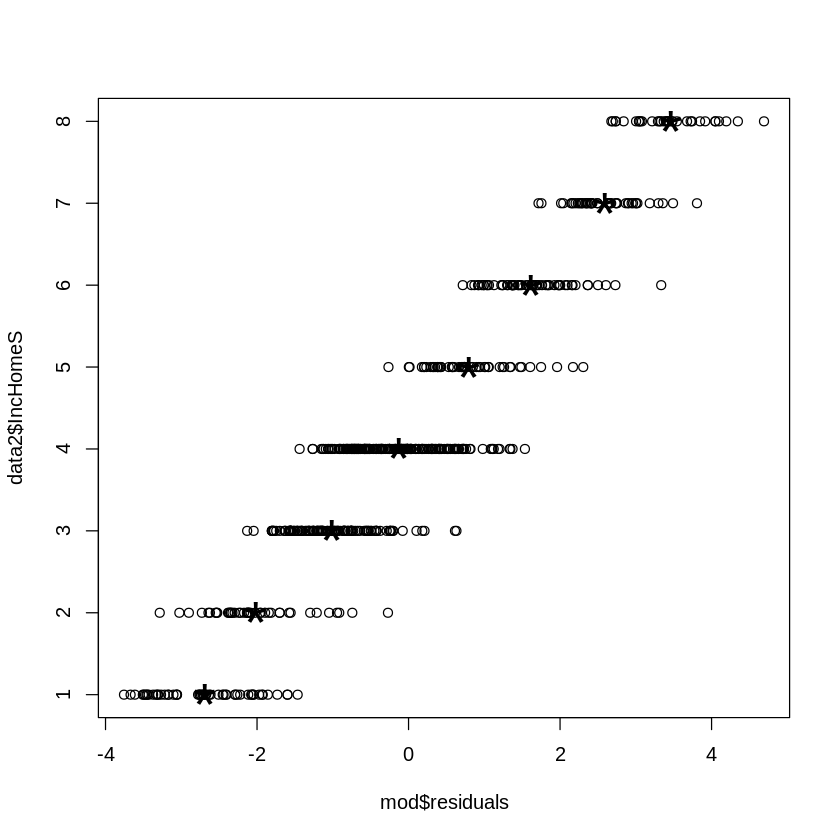

In [42]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [43]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.76  -1.08  -0.18   1.02   4.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53248    0.31962    4.79  2.0e-06 ***
ComfNS       0.37397    0.04712    7.94  9.7e-15 ***
Age          0.01922    0.00612    3.14   0.0018 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 624 degrees of freedom
Multiple R-squared:  0.11,	Adjusted R-squared:  0.107 
F-statistic: 38.6 on 2 and 624 DF,  p-value: <2e-16


In [41]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

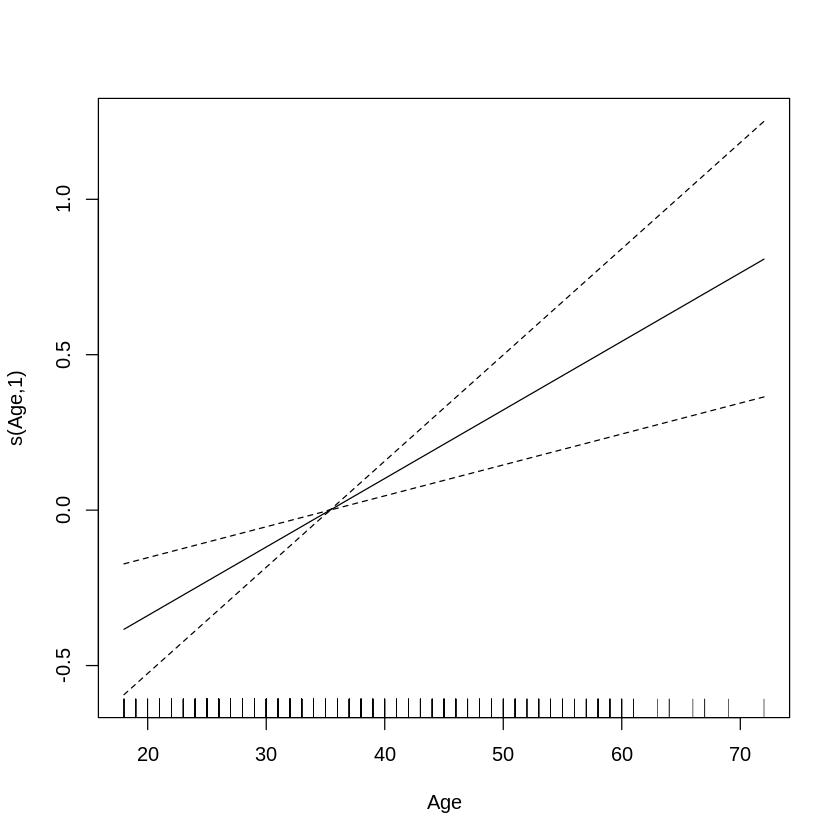

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



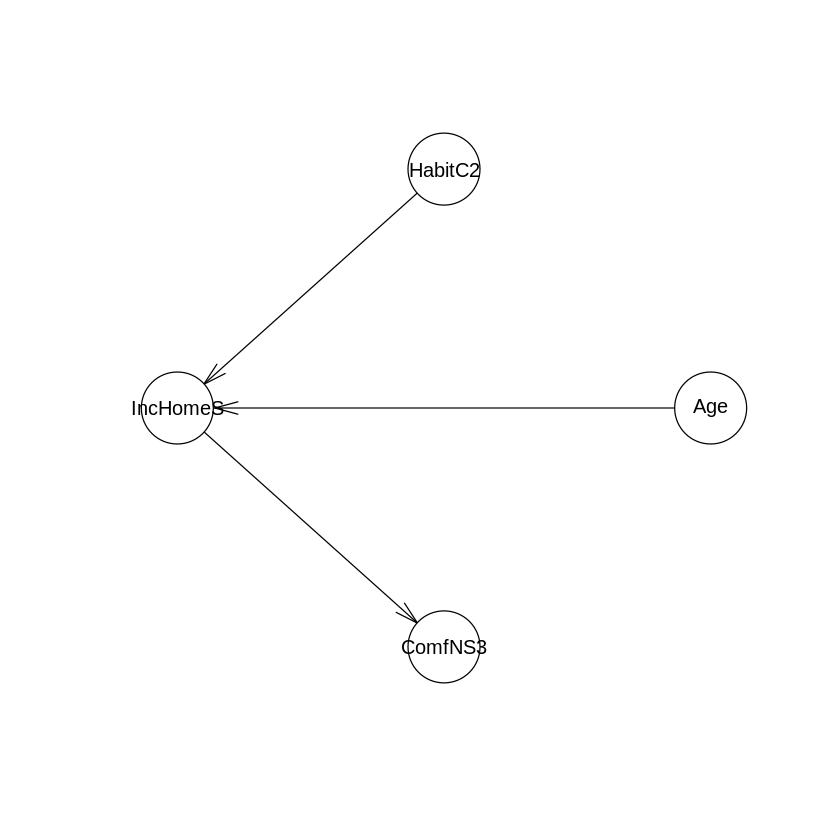

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

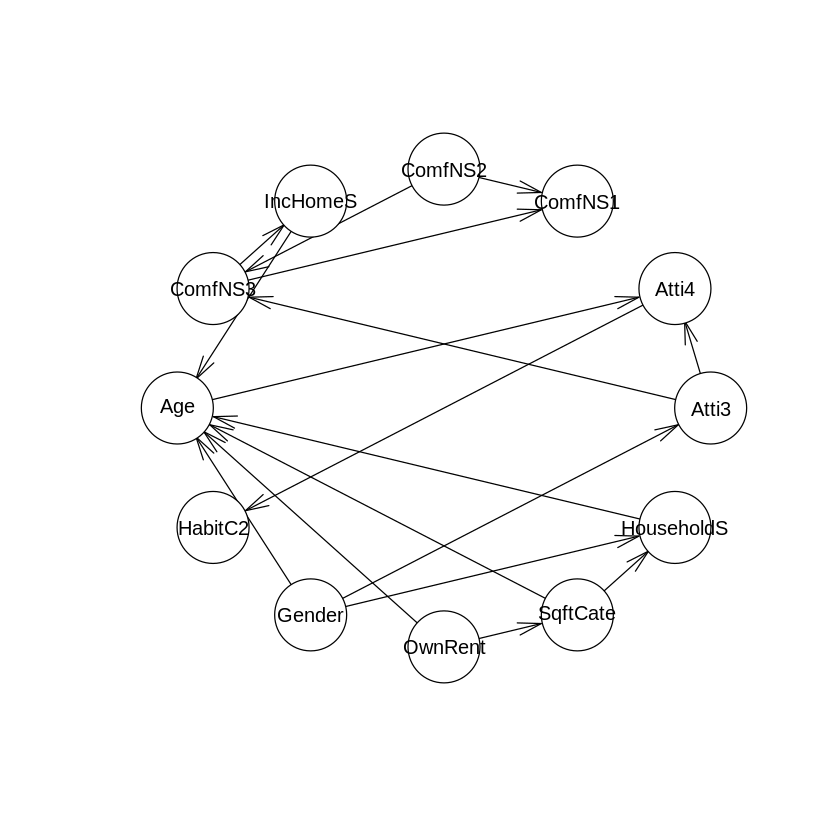

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)